<a id="A"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> News classification </b></div>

<div style="text-align: center;">
    <img src="https://www.queestudiar.org/wp-content/uploads/2019/10/presenta-626x350.jpg" alt="news" style="width:100%; height:auto; border-radius: 15px;">
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Introduction </b></div>

Automated news classification using artificial intelligence is critical because it enables efficient and accurate sorting of vast amounts of information, ensuring that users receive relevant and timely content. This technology helps manage the overwhelming volume of news data, improves information accessibility, and supports personalized content delivery, making it an essential tool in the digital age for both consumers and content providers.
    


This notebook is a collaborative effort between the Data Scientists:  - **Edumis Viera**: [Kaggle Profile](https://www.kaggle.com/edumisvieramartin) and - **Anna Balatska**: [Kaggle Profile](https://www.kaggle.com/annastasy) to explore and implement a comprehensive news classification system using natural language processing (NLP) techniques. Our aim is to demonstrate the application of machine learning algorithms, particularly Logistic Regression, to classify news articles into distinct categories. Through this work, we invite you to delve into the process, from data preprocessing to model evaluation, and gain insights into the practical application of AI in text classification. We encourage you to explore the details of this project and see the impact of our combined expertise.
 



<div style="text-align: center;">
    <img src="https://i.postimg.cc/sgxhGvPL/Edu-and-Anna.png" alt="news" style="width:60%; height:auto; border-radius: 0px;">
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Project </b></div>

<h2>Project Summary 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        In this project, we focus on classifying news articles into four distinct categories: World, Sports, Business, and Sci/Tech. The goal is to accurately categorize each piece of text based on its content using techniques from Natural Language Processing (NLP). To achieve this, we will employ the Logistic Regression algorithm, a widely used method in text classification tasks due to its simplicity and effectiveness. This project demonstrates the application of NLP and machine learning techniques to automatically sort news articles into their respective categories.
    </ul>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Import Libraries 📚</b></div>


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        In this section we are importing the necessary libraries to carry out the project.
    </ul>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Load data ✅</b></div>


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this section we are loading the databases and mapping the numerical categories to their respective categorical values.</li>
        <li>Also, we are displaying some examples of news with their respective labels and saving them for use them ahead</li>
    </ul>
</div>

In [2]:
train_dataset = pd.read_csv('/kaggle/input/ag-news-topic-classification/training_data.csv')
train_dataset

,text,label
0,Wall St. Bears Claw Back Into the Black (Reute...,2
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2
3,Iraq Halts Oil Exports from Main Southern Pipe...,2
4,"Oil prices soar to all-time record, posing new...",2
...,...,...
119995,Pakistan's Musharraf Says Won't Quit as Army C...,0
119996,Renteria signing a top-shelf deal Red Sox gene...,1
119997,Saban not going to Dolphins yet The Miami Dolp...,1
119998,Today's NFL games PITTSBURGH at NY GIANTS Time...,1


In [3]:
test_dataset = pd.read_csv('/kaggle/input/ag-news-topic-classification/test_data.csv', header=None, names=['text', 'label'])
test_dataset

,text,label
0,Three quarters of financial firms still conduc...,2
1,European stocks rally on hope ECB may be done ...,2
2,"Gold prices have hit a new high, while the val...",2
3,Why food discount stickers may be a thing of t...,2
4,German cabinet tries to solve ‘no-debt’ crisis...,2
5,Indonesia's volcano eruption leaves 22 dead,0
6,"Adverts for Air France, Lufthansa and Etihad h...",0
7,Maori MP performs haka before swearing oath to...,0
8,Philippines earthquake: Video shows chaos in s...,0
9,Wakeskater plunges off Dubai skyscraper pool i...,0


In [4]:
category_mapping = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}

train_dataset['Category'] = train_dataset['label'].map(category_mapping)
test_dataset['Category'] = test_dataset['label'].map(category_mapping)

In [5]:
def display_and_save_random_examples(test_dataset, category_mapping, num_examples=5):
    saved_examples = []
    
    unique_categories = test_dataset['Category'].unique()
    
    for category in unique_categories:
        category_data = test_dataset[test_dataset['Category'] == category]
        
        random_examples = category_data.sample(n=num_examples, random_state=42)
        
        for i, row in random_examples.iterrows():
            saved_examples.append({
                'text': row['text'],
                'true_label': row['Category']
            })
            print(f"Category: {row['Category']}\nText: {row['text']}\n")
            print('-' * 80)
    
    return saved_examples

print("Examples from the test dataset:")
saved_examples = display_and_save_random_examples(test_dataset, category_mapping)

Examples from the test dataset:
Category: Business
Text: European stocks rally on hope ECB may be done with interest rate hikes

--------------------------------------------------------------------------------
Category: Business
Text: German cabinet tries to solve ‘no-debt’ crisis after court outlaws budget

--------------------------------------------------------------------------------
Category: Business
Text: Gold prices have hit a new high, while the value of Bitcoin has also surged.

--------------------------------------------------------------------------------
Category: Business
Text: Three quarters of financial firms still conducting anti-money laundering checks manually

--------------------------------------------------------------------------------
Category: Business
Text: Why food discount stickers may be a thing of the past

--------------------------------------------------------------------------------
Category: World
Text: Adverts for Air France, Lufthansa and Etihad h

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Data Visualization 📊</b></div>

 <h2>Distribution of Categories in Training and Test Datasets 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
       These code snippets plot bar charts showing the distribution of different categories in the training and test datasets. The x-axis represents the categories, and the y-axis shows the count of samples in each category.
    </ul>
</div>

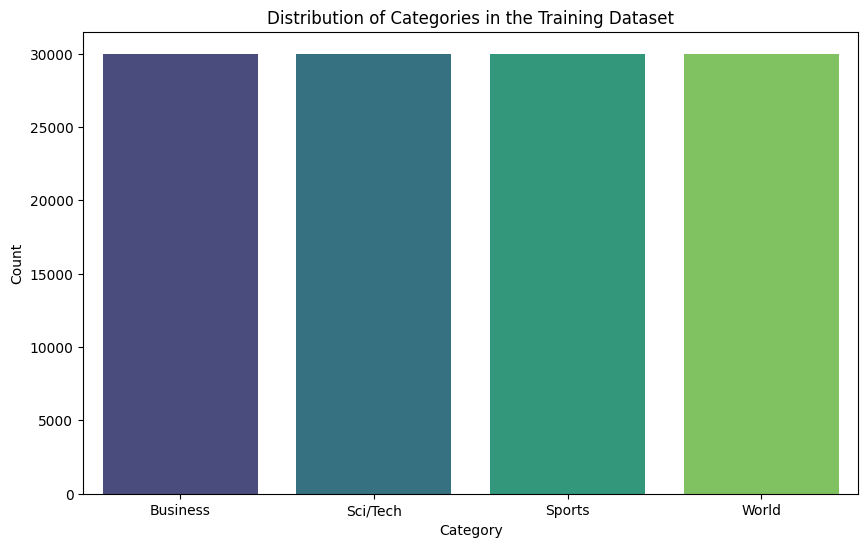

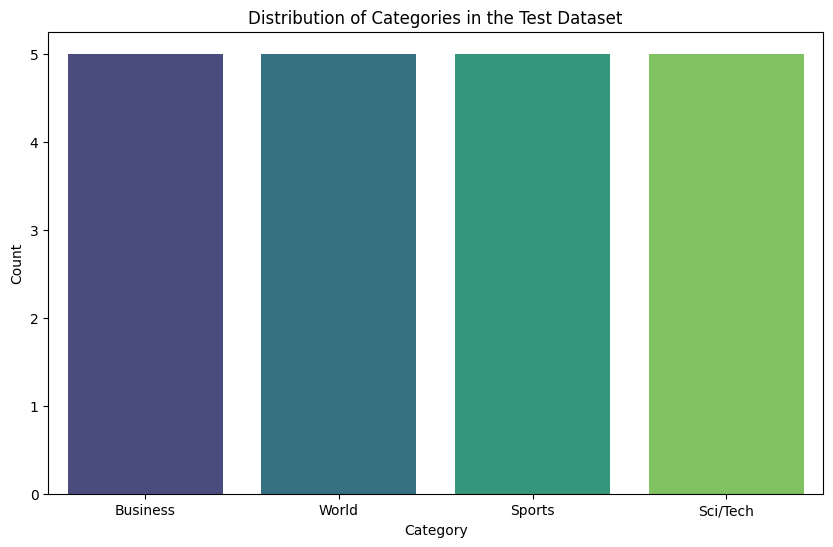

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_dataset, x='Category', palette='viridis')
plt.title('Distribution of Categories in the Training Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=test_dataset, x='Category', palette='viridis')
plt.title('Distribution of Categories in the Test Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()



 <h2>Text Length Distribution by Category 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
       These snippets visualize the distribution of text length across categories in the training dataset. The first plot shows the distribution of character counts, while the second plot shows the distribution of word counts per text for each category.
    </ul>
</div>

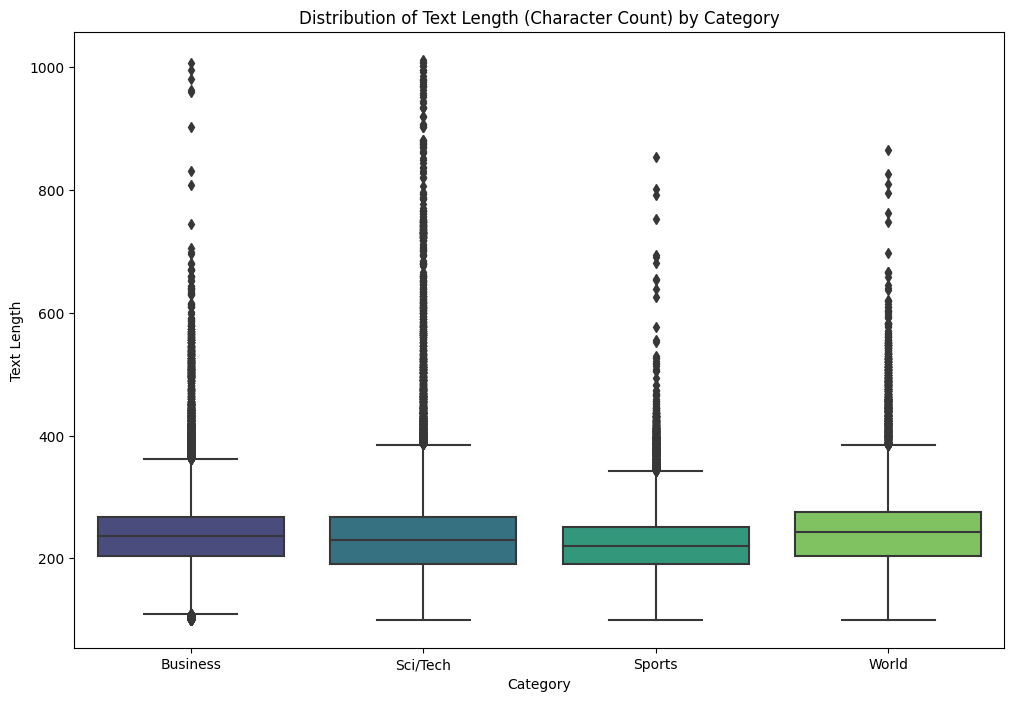

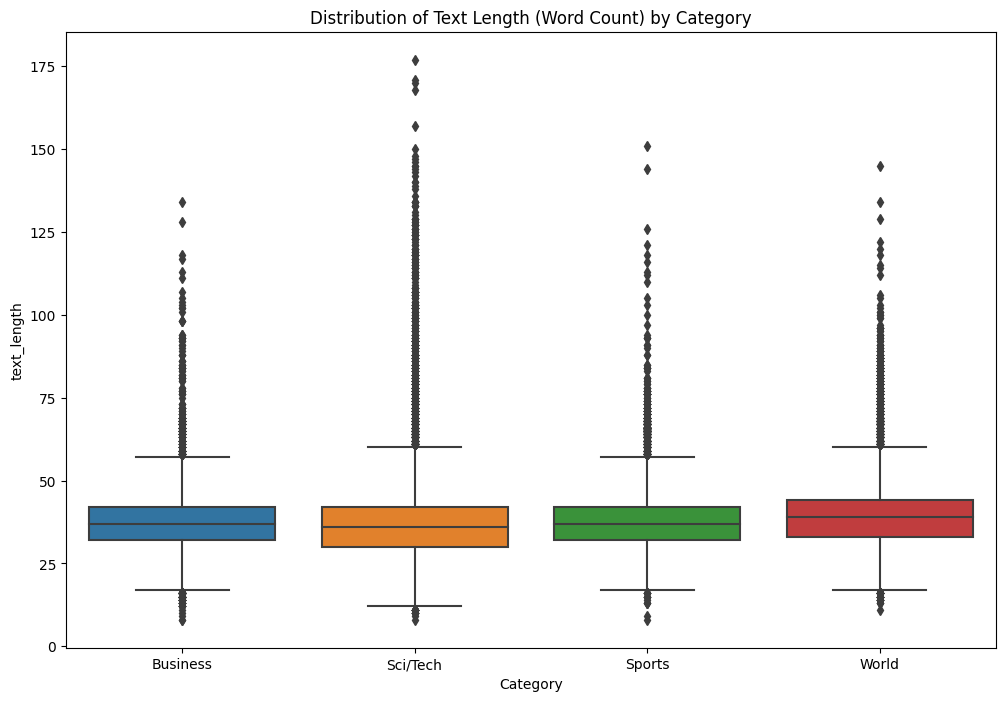

In [7]:
train_dataset['text_length'] = train_dataset['text'].apply(len)
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_dataset, x='Category', y='text_length', palette='viridis')
plt.title('Distribution of Text Length (Character Count) by Category')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.show()

train_dataset['text_length'] = train_dataset['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='text_length', data=train_dataset)
plt.title('Distribution of Text Length (Word Count) by Category')
plt.show()

 
   <h2>Word Cloud for Each Category 📝</h2>     
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <p>This code generates and displays word clouds for each category in the training dataset. Word clouds visually represent the most frequent words in the text, with larger words indicating higher frequency.</p>
    </ul>
</div>

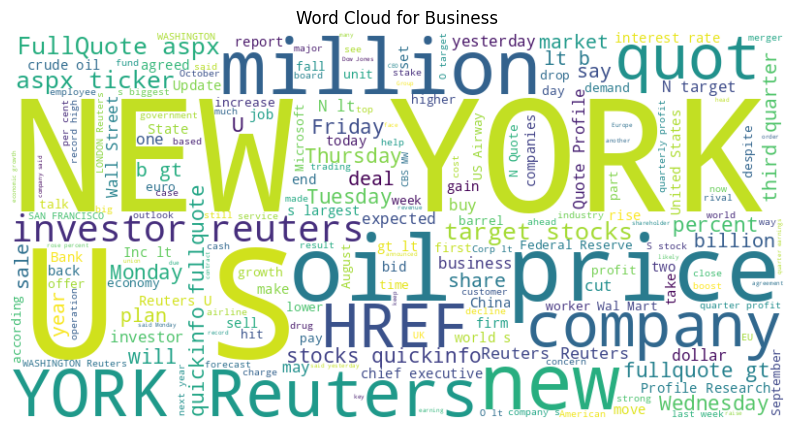

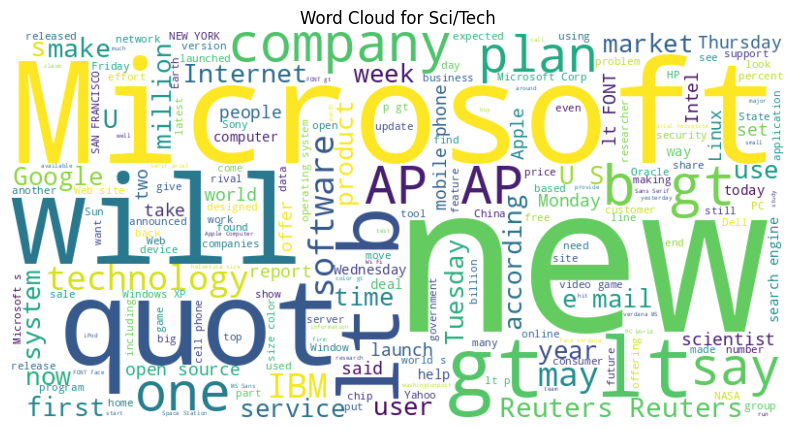

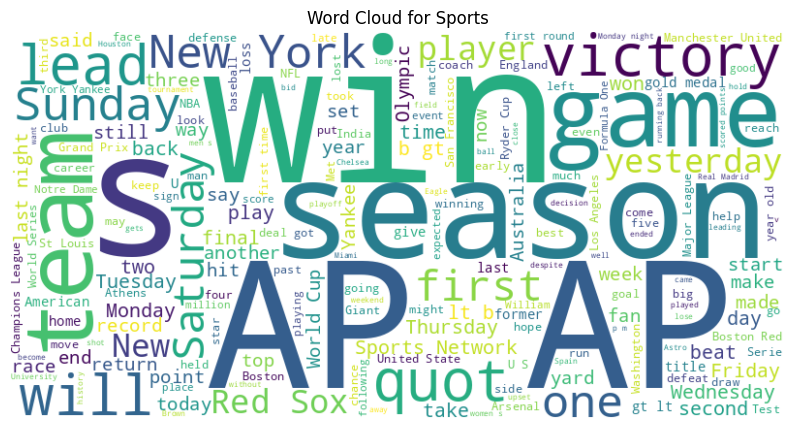

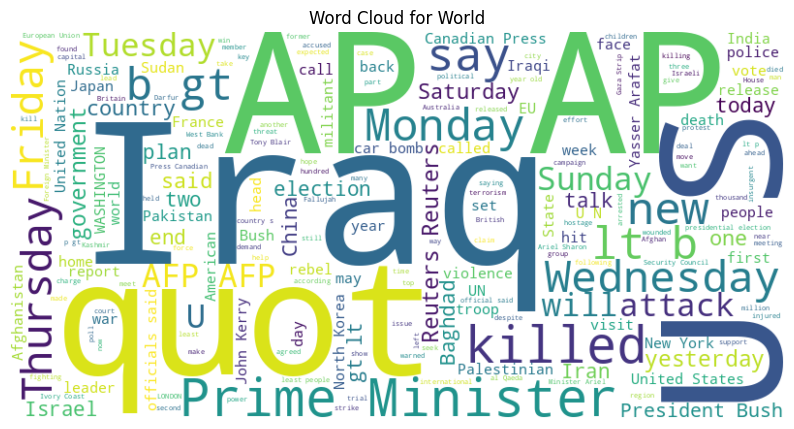

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_clouds(data, category_column, text_column):
    categories = data[category_column].unique()
    
    for category in categories:
        text = " ".join(data[data[category_column] == category][text_column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for {category}")
        plt.axis("off")
        plt.show()

generate_word_clouds(train_dataset, 'Category', 'text')

 <h3>Most Common Words in Each Category 📝</h3>       
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <p>This snippet generates bar charts showing the top 20 most common words in the text for each category in the training dataset.</p>
    </ul>
</div>

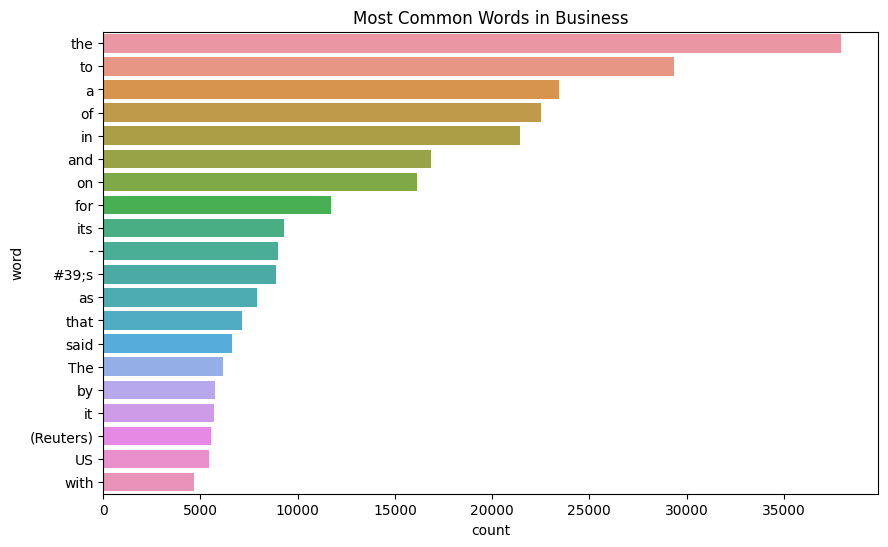

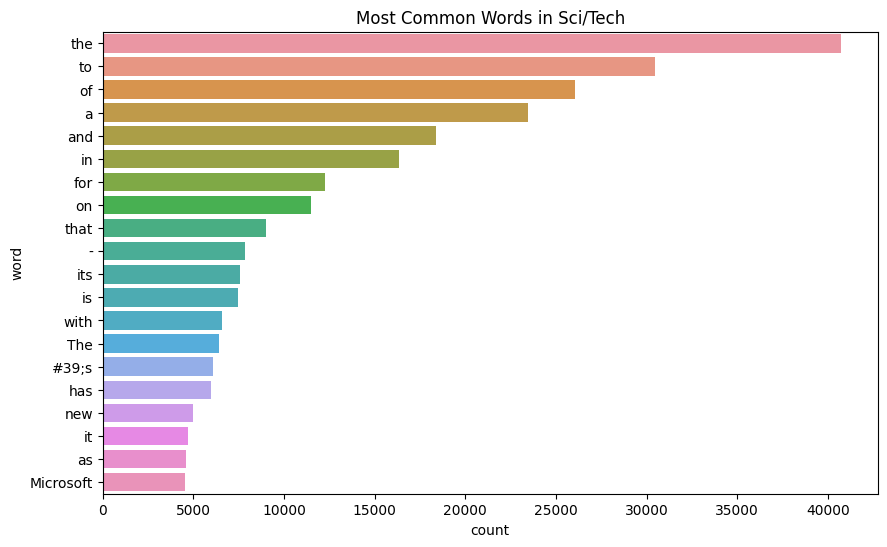

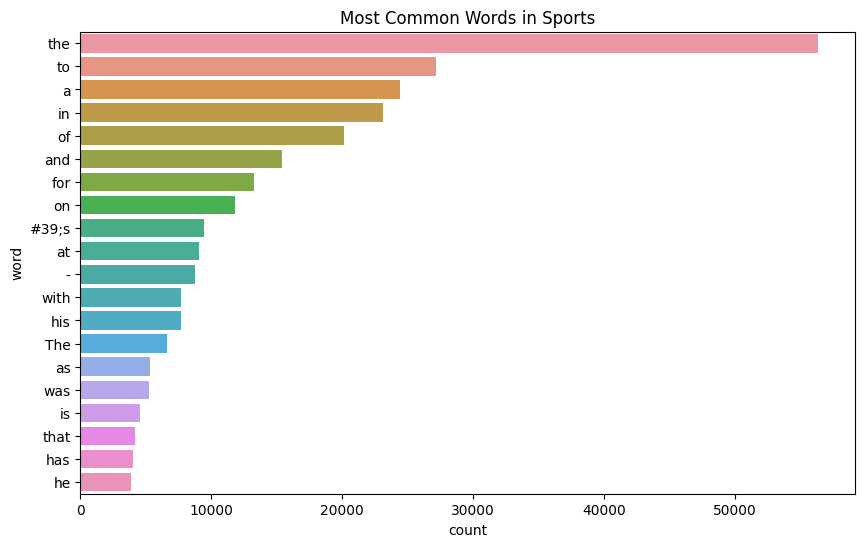

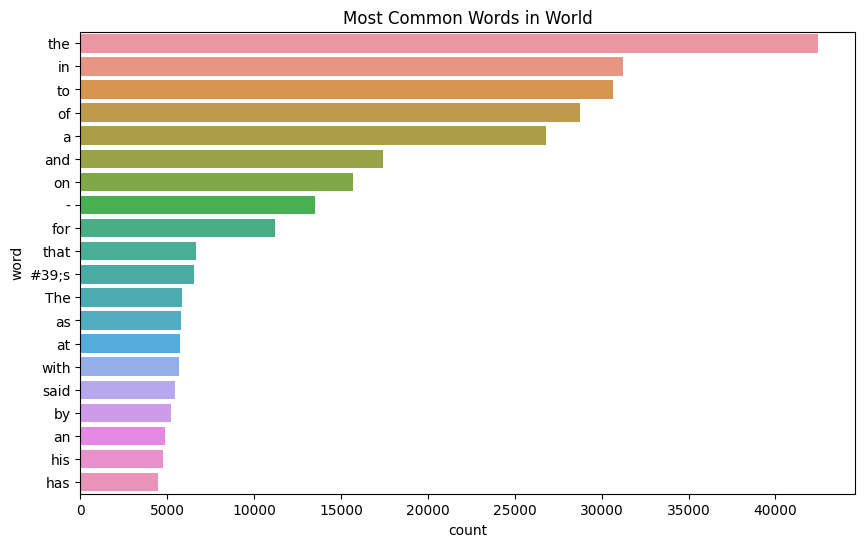

In [9]:
from collections import Counter

for category in train_dataset['Category'].unique():
    words = " ".join(train_dataset[train_dataset['Category'] == category]['text']).split()
    common_words = Counter(words).most_common(20)
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=common_words_df)
    plt.title(f'Most Common Words in {category}')
    plt.show()

 <h2>Top N-grams in the Text 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <p>This code generates a bar chart of the most frequent n-grams (in this case, bigrams) in the text across the entire training dataset.</p>
    </ul>
</div>

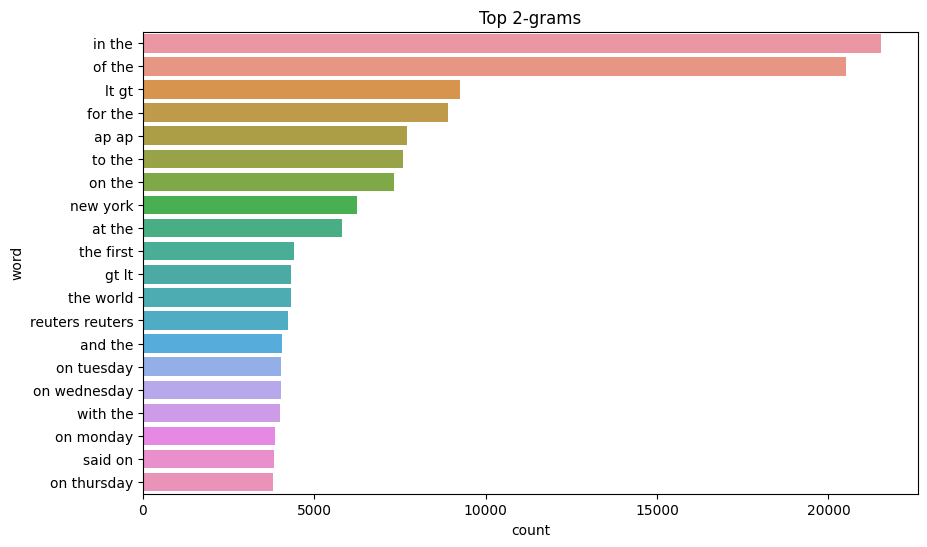

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(corpus, n=2, top_k=20):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    common_words = pd.DataFrame(words_freq[:top_k], columns=['word', 'count'])
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=common_words)
    plt.title(f'Top {n}-grams')
    plt.show()

plot_top_ngrams(train_dataset['text'], n=2, top_k=20)  # For bigrams

<h2>TF-IDF Scores by Word and Category 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <p>This snippet visualizes the TF-IDF (Term Frequency-Inverse Document Frequency) scores for the top 20 words across different categories in the training dataset. The TF-IDF score reflects the importance of a word within the text relative to its frequency across documents.</p>
    </ul>
</div>

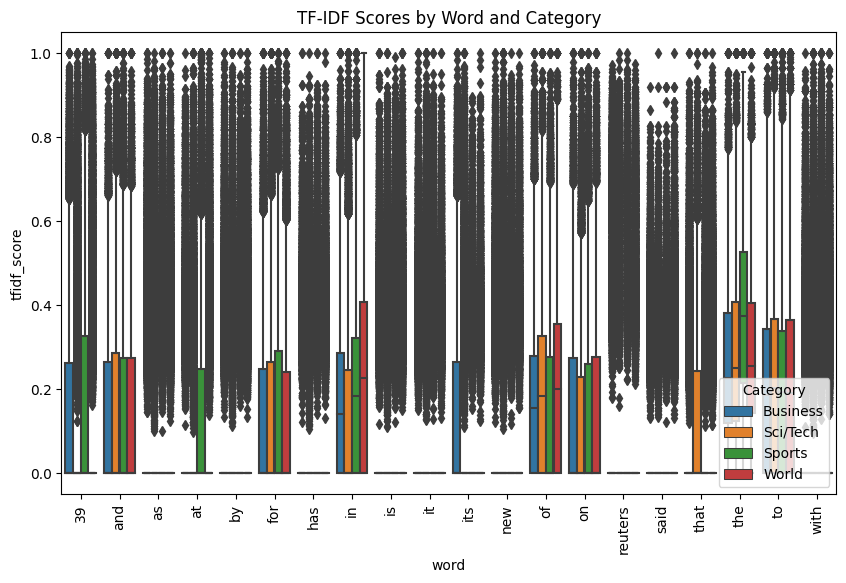

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf.fit_transform(train_dataset['text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['Category'] = train_dataset['Category']

tfidf_melted = tfidf_df.melt(id_vars='Category', var_name='word', value_name='tfidf_score')

plt.figure(figsize=(10, 6))
sns.boxplot(x='word', y='tfidf_score', hue='Category', data=tfidf_melted)
plt.title('TF-IDF Scores by Word and Category')
plt.xticks(rotation=90)
plt.show()

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Build Model 🎯</b></div>

<h2>Splitting Data 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        Next code allows us to split our biggest dataset into training and testing sets
    </ul>
</div>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset['text'], train_dataset['label'], test_size=0.05, random_state=42)

In [13]:
len(X_train)

114000

In [14]:
len(X_test)

6000

<h2>TF-IDF vectorization and model building 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        This code transforms text data into numerical features using TF-IDF vectorization, the max_features=5000 parameter limits the vectorization to the 5000 most important words. After, a logistic regression model is employed to classify the text. The model is trained on the transformed training data and used to predict the categories of the test data.
    </ul>
</div>

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:5px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1e91ed; overflow:hidden"><b> Evaluate Model ✅</b></div>

<h2>Classification Report and Confusion Matrix 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        We are using the classification report and confusion matrix to evaluate the model's performance. The classification report provides detailed metrics such as precision, recall, and F1-score for each category, giving us insight into the model's effectiveness in classifying each class correctly. The confusion matrix further helps us visualize the true positives, false positives, true negatives, and false negatives, allowing us to understand where the model may be making errors.
    </ul>
</div>

In [16]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=category_mapping.values()))


Classification Report:
              precision    recall  f1-score   support

       World       0.92      0.91      0.92      1446
      Sports       0.96      0.97      0.97      1582
    Business       0.88      0.88      0.88      1460
    Sci/Tech       0.89      0.89      0.89      1512

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



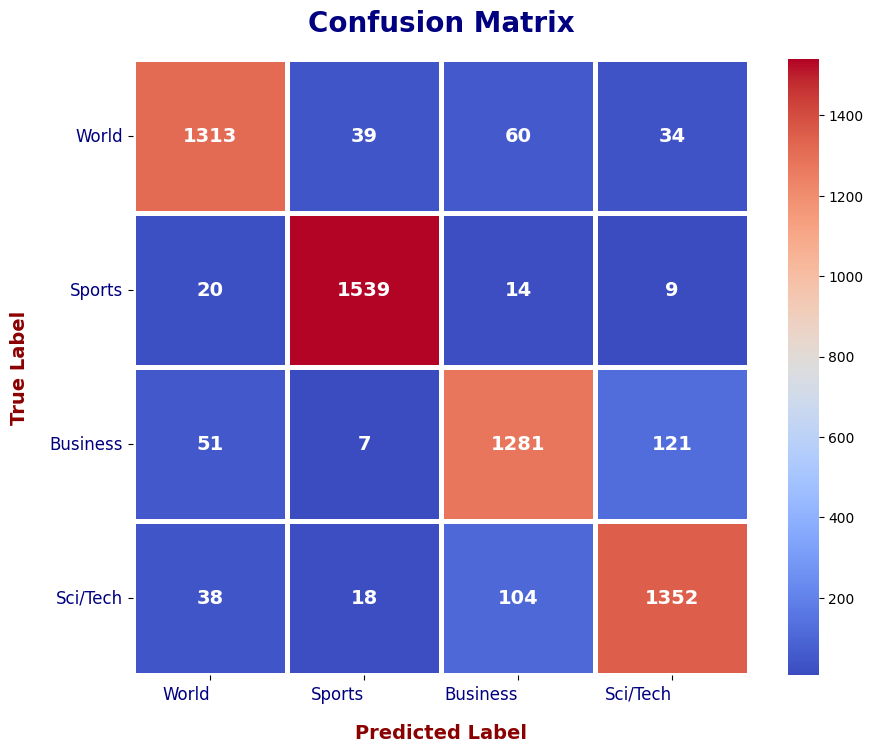

In [17]:
mapped_categories = [category_mapping[i] for i in sorted(category_mapping.keys())]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
ax = plt.gca()

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=True, 
            square=True, linewidths=2.5, linecolor='white', 
            annot_kws={"size": 14, "weight": "bold"}, ax=ax,
            xticklabels=mapped_categories, yticklabels=mapped_categories)

plt.title('Confusion Matrix', fontsize=20, weight='bold', color='navy', pad=20)
plt.xlabel('Predicted Label', fontsize=14, weight='bold', color='darkred', labelpad=15)
plt.ylabel('True Label', fontsize=14, weight='bold', color='darkred', labelpad=15)

ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12, color='navy')
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12, color='navy')

ax.spines['top'].set_color('navy')
ax.spines['right'].set_color('navy')
ax.spines['bottom'].set_color('navy')
ax.spines['left'].set_color('navy')

plt.show()


<h2>Conclusions of Model Evaluation 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        The model achieved a classification accuracy of 91%, which is a strong result for an NLP text classification task using logistic regression on a dataset with approximately 120,000 examples. This high accuracy indicates that the model is effective at correctly classifying the majority of news articles into their respective categories. In the context of text classification, this means that the model has successfully learned to identify patterns and features in the text that are characteristic of each category, leading to reliable predictions on unseen data.
    </ul>
</div>

<h2>Final Predictions on Saved Test Examples 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #1e91ed;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">       
In the following code, we are using the examples that were saved at the beginning of the project from the test dataset. These consist of 20 examples in total, with 5 examples belonging to each of the four categories. We are applying the model we implemented to generate predictions for these news texts, thus we are concluding the project by demonstrating the excellent performance of our predictive model.
    </ul>
</div>

In [18]:
X_test = pd.Series(X_test)

In [19]:
X_test_tfidf = vectorizer.transform(test_dataset['text'])

y_predicted_test_dataset = model.predict(X_test_tfidf)

In [20]:
for example in saved_examples:
   
    idx = test_dataset[test_dataset['text'] == example['text']].index[0]
    
    predicted_category = category_mapping[y_predicted_test_dataset[idx]]
    
    print(f"Original Text: {example['text']}")
    print(f"True Label: {example['true_label']}")
    print(f"Predicted Label: {predicted_category}") 
    print("-" * 80)

Original Text: European stocks rally on hope ECB may be done with interest rate hikes
True Label: Business
Predicted Label: Business
--------------------------------------------------------------------------------
Original Text: German cabinet tries to solve ‘no-debt’ crisis after court outlaws budget
True Label: Business
Predicted Label: Business
--------------------------------------------------------------------------------
Original Text: Gold prices have hit a new high, while the value of Bitcoin has also surged.
True Label: Business
Predicted Label: Business
--------------------------------------------------------------------------------
Original Text: Three quarters of financial firms still conducting anti-money laundering checks manually
True Label: Business
Predicted Label: Business
--------------------------------------------------------------------------------
Original Text: Why food discount stickers may be a thing of the past
True Label: Business
Predicted Label: Sci/Tech
-

# **Thank you for exploring this work!** 

If you find it helpful, please consider upvoting it 💙. 

Your support is greatly appreciated 🤩!

<div style="text-align: center;">
    <img src="https://i.insider.com/4efe28b769bedd454a000004?width=800&format=jpeg&auto=webp" alt="news" style="width:100%; height:auto; border-radius: 15px;">
</div>